Implement the CNN model for classifying CIFAR10 image dataset by dividing the
model into following 4 stages:
a. Loading and preprocessing the image data
b. Defining the model's architecture
c. Training the model
d. Estimating the model's performance

In [1]:
from tensorflow.keras.datasets import cifar10
((xtrain, ytrain), (xtest, ytest)) = cifar10.load_data()
print(xtrain.shape, xtest.shape, ytrain.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1)


In [2]:
xtrain = xtrain/255.0
xtest = xtest/255.0
ytrain = ytrain.flatten()
ytest = ytest.flatten()

In [3]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

In [5]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
 flatten_1 (Flatten)         (None, 256)              

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
h = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=10, batch_size=512)

Epoch 1/10
98/98 [==============================] - 2s 23ms/step - loss: 1.5874 - accuracy: 0.4168 - val_loss: 1.5233 - val_accuracy: 0.4393
Epoch 2/10
98/98 [==============================] - 2s 18ms/step - loss: 1.5133 - accuracy: 0.4464 - val_loss: 1.4647 - val_accuracy: 0.4636
Epoch 3/10
98/98 [==============================] - 2s 17ms/step - loss: 1.4432 - accuracy: 0.4741 - val_loss: 1.4082 - val_accuracy: 0.4872
Epoch 4/10
98/98 [==============================] - 2s 18ms/step - loss: 1.3991 - accuracy: 0.4932 - val_loss: 1.4014 - val_accuracy: 0.4950
Epoch 5/10
98/98 [==============================] - 2s 17ms/step - loss: 1.3647 - accuracy: 0.5081 - val_loss: 1.3843 - val_accuracy: 0.4897
Epoch 6/10
98/98 [==============================] - 2s 18ms/step - loss: 1.3373 - accuracy: 0.5192 - val_loss: 1.3269 - val_accuracy: 0.5193
Epoch 7/10
98/98 [==============================] - 2s 19ms/step - loss: 1.3018 - accuracy: 0.5340 - val_loss: 1.3074 - val_accuracy: 0.5265
Epoch 8/10
98

In [10]:
from sklearn.metrics import classification_report as cf
preds = model.predict(xtest)
print(cf(ytest, preds.argmax(axis=1)))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.54      0.60      0.57      1000
           1       0.60      0.76      0.67      1000
           2       0.43      0.40      0.41      1000
           3       0.38      0.44      0.41      1000
           4       0.57      0.35      0.43      1000
           5       0.48      0.43      0.45      1000
           6       0.62      0.70      0.66      1000
           7       0.71      0.54      0.61      1000
           8       0.58      0.72      0.65      1000
           9       0.63      0.58      0.61      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.55      0.55      0.55     10000



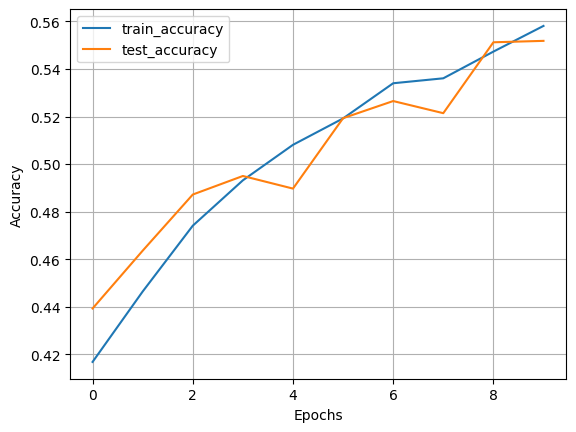

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(0,10),h.history['accuracy'],label = 'train_accuracy')
plt.plot(range(0,10),h.history['val_accuracy'],label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

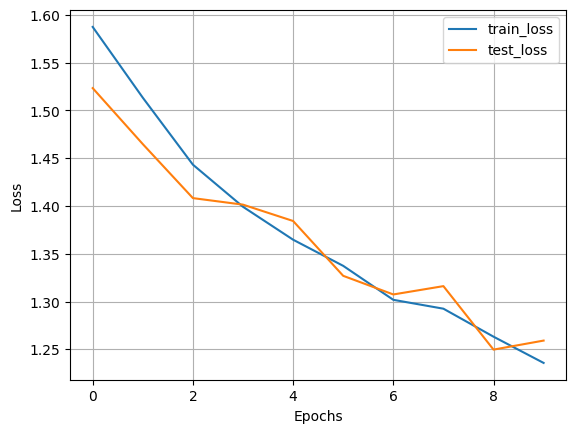

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(0,10),h.history['loss'],label = 'train_loss')
plt.plot(range(0,10),h.history['val_loss'],label = 'test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid();

In [14]:
from tensorflow.keras.layers import Dropout, BatchNormalization
newmodel = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')

])
newmodel.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
h = newmodel.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=10, batch_size=512)


Epoch 1/10
98/98 [==============================] - 11s 60ms/step - loss: 2.2898 - accuracy: 0.3928 - val_loss: 3.5575 - val_accuracy: 0.1421
Epoch 2/10
98/98 [==============================] - 4s 46ms/step - loss: 1.2409 - accuracy: 0.5567 - val_loss: 4.2407 - val_accuracy: 0.1552
Epoch 3/10
98/98 [==============================] - 4s 43ms/step - loss: 1.0092 - accuracy: 0.6416 - val_loss: 3.4458 - val_accuracy: 0.2527
Epoch 4/10
98/98 [==============================] - 4s 44ms/step - loss: 0.8364 - accuracy: 0.7067 - val_loss: 2.1229 - val_accuracy: 0.3764
Epoch 5/10
98/98 [==============================] - 4s 45ms/step - loss: 0.6923 - accuracy: 0.7560 - val_loss: 1.1861 - val_accuracy: 0.5996
Epoch 6/10
98/98 [==============================] - 4s 45ms/step - loss: 0.5598 - accuracy: 0.8044 - val_loss: 0.8760 - val_accuracy: 0.7057
Epoch 7/10
98/98 [==============================] - 4s 45ms/step - loss: 0.4461 - accuracy: 0.8446 - val_loss: 0.9643 - val_accuracy: 0.7114
Epoch 8/10
9

In [15]:
test_loss, test_acc = newmodel.evaluate(xtest, ytest)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 2s 6ms/step - loss: 0.8537 - accuracy: 0.7643
Test Loss: 0.853733479976654, Test Accuracy: 0.7642999887466431


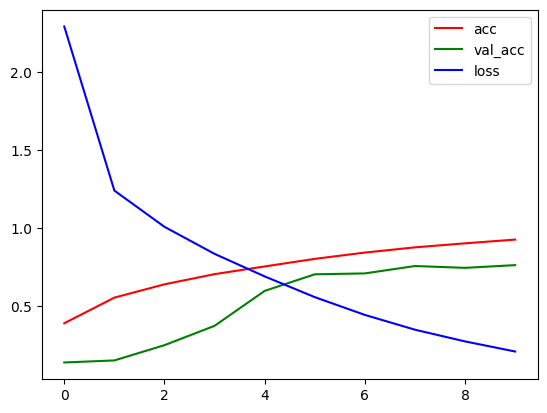

In [18]:
import numpy as np
plt.plot(np.arange(10), h.history['accuracy'], label='acc', color='red')
plt.plot(np.arange(10),h.history['val_accuracy'], label='val_acc', color='green')
plt.plot(np.arange(10),h.history['loss'], label='loss', color='blue')

plt.legend()